# Analysing

In [4]:
# Load the data
df = pd.read_csv('old_bailey_big_final.csv')

# having a quick look at the CSV file.
print(f"Total trials: {len(df)}")
print(f"\nColumns: {df.columns.tolist()}")

Total trials: 270849

Columns: ['session_date', 'session_year', 'trial_id', 'defendant_name', 'defendant_gender', 'defendant_age', 'defendant_occupation', 'victim_gender', 'offence_category', 'offence_subcategory', 'verdict', 'verdict_detail', 'punishment', 'punishment_detail', 'crime_location', 'crime_date', 'value_pounds', 'value_shillings', 'value_pence', 'fine_pounds', 'juror_ids', 'judge_ids']


C:\Users\shayb\AppData\Local\Temp\ipykernel_24020\4254514654.py:2: DtypeWarning: Columns (6,14,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('old_bailey_big_final.csv')


We're working with 270849 trials! thats plenty of data. 

In [5]:
df.head(10)

,session_date,session_year,trial_id,defendant_name,defendant_gender,defendant_age,defendant_occupation,victim_gender,offence_category,offence_subcategory,...,punishment,punishment_detail,crime_location,crime_date,value_pounds,value_shillings,value_pence,fine_pounds,juror_ids,judge_ids
0,16740429,1674,t16740429-1,Prisoner,male,NaN,NaN,male,violentTheft,highwayRobbery,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,16740429,1674,t16740429-2,another,male,NaN,NaN,male,theft,grandLarceny,...,death,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,16740429,1674,t16740429-3,others,male,NaN,NaN,male,theft,burglary,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,16740429,1674,t16740429-3,one,male,NaN,NaN,male,theft,burglary,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,16740429,1674,t16740429-3,more,male,NaN,NaN,male,theft,burglary,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,16740429,1674,t16740429-4,Man,male,NaN,NaN,female,sexual,rape,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,16740429,1674,t16740429-5,Woman,female,NaN,NaN,female,theft,other,...,transport,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,16740429,1674,t16740429-6,person,male,NaN,NaN,male,theft,burglary,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,16740429,1674,t16740429-7,one,male,NaN,NaN,male,theft,housebreaking,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,16740429,1674,t16740429-7,other,male,NaN,NaN,male,theft,housebreaking,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
print(df.isna().mean().mean())

0.33463244699579336


In [7]:
# Check the important columns
print(df['defendant_gender'].isna().mean())
print(df['victim_gender'].isna().mean())
print(df['session_year'].isna().mean())

8.861025885271867e-05
0.13442914686781196
0.0


Oh this is fantastic! Our key columns only make up for ~13% of the missing data! With victim gender being the column with the most missing values. This just means I'll need to extract the columns that have both Victim gender and defenfent gender identified - which doesn't look like it should be an issue.     
Looks like I need to change the session_date column to datetime format and check some column names for NaN values

In [8]:
# turn session_date to datetime datatype. i.e. 16791210 needs to be 1679-12-10 
df['session_date'] = pd.to_datetime(df['session_date'])

In [9]:
# check how many of these values are unique. If they're all "two women" or "fellow", this might be a useless column
df['defendant_name'].nunique()

123195

In [10]:
df['offence_subcategory'].nunique()

56

nevermind! that's a lot!  Moving on to the analysis! 

In [11]:
print("Offence Types by Gender")
offence_by_gender = (df.groupby(['defendant_gender', 'offence_subcategory']).size())
offence_by_gender

Offence Types by Gender


defendant_gender  offence_subcategory 
female            animalTheft               148
                  arson                     167
                  assault                   101
                  assaultWithIntent           6
                  bankrupcy                  14
                                          ...  
male              theftFromPlace          14815
                  threateningBehaviour      191
                  treason                    94
                  vagabond                    4
                  wounding                 5426
Length: 138, dtype: int64

Offence Types by Gender


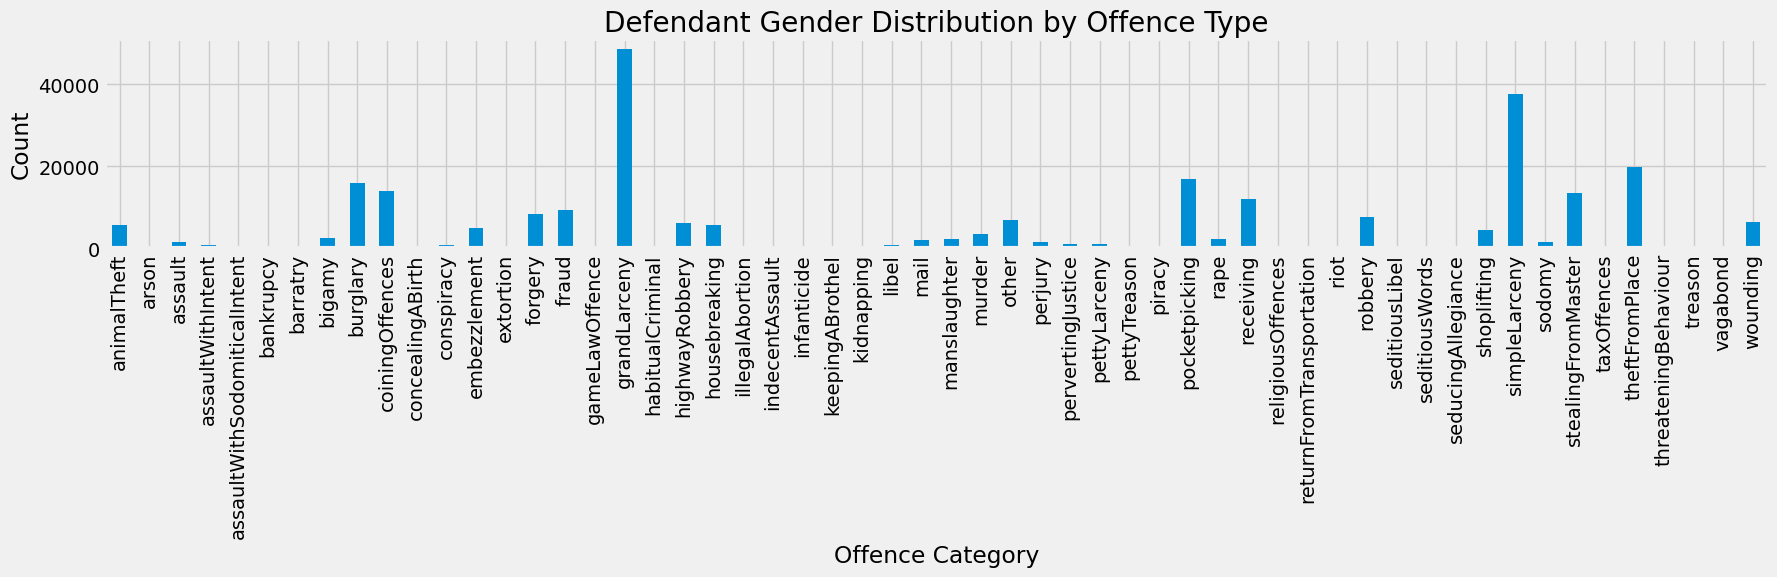

In [12]:
print("Offence Types by Gender")
offence_subcategory_grouped = (df.groupby(['offence_subcategory']).size())

# Plot
offence_subcategory_grouped.plot(kind='bar', stacked=True, figsize=(18, 6))
plt.xlabel('Offence Category')
plt.ylabel('Count')
plt.title('Defendant Gender Distribution by Offence Type')
plt.tight_layout()
plt.show()

In [13]:
df

,session_date,session_year,trial_id,defendant_name,defendant_gender,defendant_age,defendant_occupation,victim_gender,offence_category,offence_subcategory,...,punishment,punishment_detail,crime_location,crime_date,value_pounds,value_shillings,value_pence,fine_pounds,juror_ids,judge_ids
0,1970-01-01 00:00:00.016740429,1674,t16740429-1,Prisoner,male,NaN,NaN,male,violentTheft,highwayRobbery,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1970-01-01 00:00:00.016740429,1674,t16740429-2,another,male,NaN,NaN,male,theft,grandLarceny,...,death,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1970-01-01 00:00:00.016740429,1674,t16740429-3,others,male,NaN,NaN,male,theft,burglary,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1970-01-01 00:00:00.016740429,1674,t16740429-3,one,male,NaN,NaN,male,theft,burglary,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1970-01-01 00:00:00.016740429,1674,t16740429-3,more,male,NaN,NaN,male,theft,burglary,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270844,1970-01-01 00:00:00.019130401,1913,t19130401-64,JOHN SHEPHERD,male,24,NaN,NaN,sexual,rape,...,imprison,hardLabour,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t19130401-name-2; t19130401-name-3; t19130401-...
270845,1970-01-01 00:00:00.019130401,1913,t19130401-65,ALBERT JAMES WILLSON,male,24,NaN,male,kill,manslaughter,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t19130401-name-2; t19130401-name-3; t19130401-...
270846,1970-01-01 00:00:00.019130401,1913,t19130401-65,REGINALD ALEXANDER CHARLES WILLSON,male,18,NaN,male,kill,manslaughter,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t19130401-name-2; t19130401-name-3; t19130401-...
270847,1970-01-01 00:00:00.019130401,1913,t19130401-66,ERNEST ANDREWS,male,17,NaN,NaN,sexual,sodomy,...,imprison,otherInstitution,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t19130401-name-2; t19130401-name-3; t19130401-...


since we're working with binary gender categories for the sake of this research question, we won't use indeterminate gender rows. We can eliminate these rows from our dataframe - but first lets check how many rows that would be deleting (I'm not expecting many based off the small numbers above)

In [14]:
# Count indeterminate rows
indeterminate_count = len(df[(df['defendant_gender'] == 'indeterminate') | (df['victim_gender'] == 'indeterminate')])
print("Rows with indeterminate gender:", indeterminate_count)

Rows with indeterminate gender: 9897


In [15]:
# Remove indeterminate gender rows
df = df[(df['defendant_gender'] != 'indeterminate') & (df['victim_gender'] != 'indeterminate')]
print("Remaining rows:", len(df))

Remaining rows: 260952


In [16]:
print("Verdicts by Gender")
print(df.groupby(['defendant_gender', 'verdict']).size())

Verdicts by Gender
defendant_gender  verdict       
female            guilty             36974
                  miscVerdict           75
                  notGuilty          20668
                  specialVerdict        11
male              guilty            148094
                  miscVerdict          548
                  notGuilty          54062
                  specialVerdict       149
dtype: int64


Will need to annotate here 

In [17]:
print("Punishments by Gender")
print(df.groupby(['defendant_gender', 'punishment']).size())

Punishments by Gender
defendant_gender  punishment
female            corporal       1886
                  death          2800
                  imprison      16783
                  miscPunish     4311
                  noPunish       1378
                  transport     12874
male              corporal       7356
                  death         13596
                  imprison      77754
                  miscPunish     9562
                  noPunish       4706
                  transport     40876
dtype: int64


annotate here

### Now we need to work out crime rates by gender over time!

In [18]:
# Creating a column that = 1 if female, 0 if not female
df['is_female_defendant'] = (df['defendant_gender'] == 'female')

# Now to compare the female count to the male count
df['is_male_defendant'] = (df['defendant_gender'] == 'male')

In [19]:
# Grouping all trials by year, then for each year:
yearly = df.groupby('session_year').agg({
    'trial_id': 'count',              # Count total trials that year
    'is_female_defendant': 'sum',      # Count how many 1s (females) that year
    'is_male_defendant': 'sum'        # Count how many males that year
}).reset_index()

In [20]:
yearly

,session_year,trial_id,is_female_defendant,is_male_defendant
0,1674,49,9,40
1,1675,58,10,48
2,1676,90,27,63
3,1677,105,29,76
4,1678,140,39,101
...,...,...,...,...
233,1909,1312,132,1180
234,1910,1239,100,1139
235,1911,1256,117,1137
236,1912,1333,111,1222


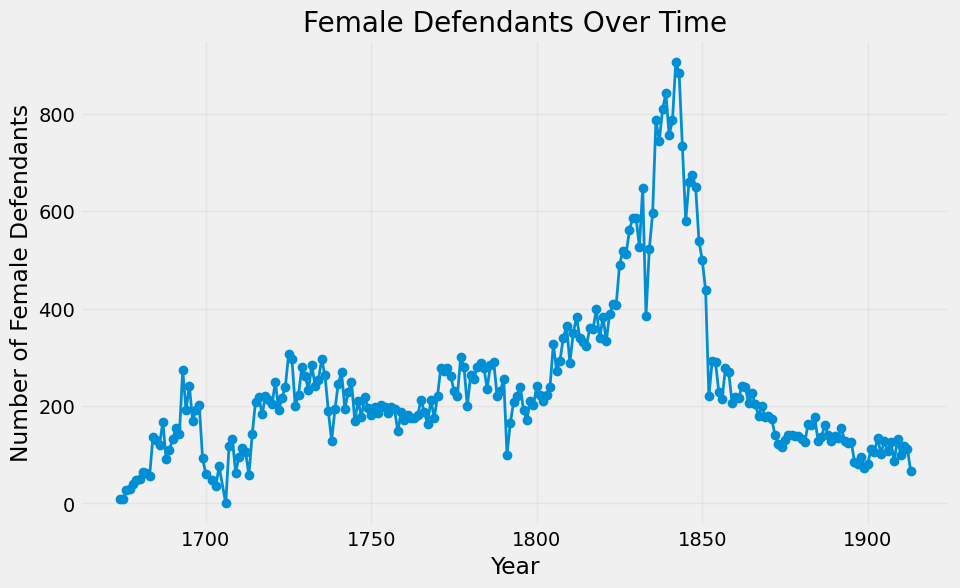

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(yearly['session_year'], yearly['is_female_defendant'], marker='o', linewidth=2)
plt.xlabel('Year')
plt.ylabel('Number of Female Defendants')
plt.title('Female Defendants Over Time')
plt.grid(True, alpha=0.3)
plt.show()

this is interesting! It looks like the number of female defendants peaks significantly between 1800 and 1850! and rapidly declines in about 1851. This is definitely worth investigating! However, this may not simply be an increase in female defendants - it may be an increase in defendants overall. In other words, there may have been more people (regardless of gender) comitting crimes during these years. lets have a look at the number of male defendants over time to investigate this...

In [22]:
df['session_year'].max()

np.int64(1913)

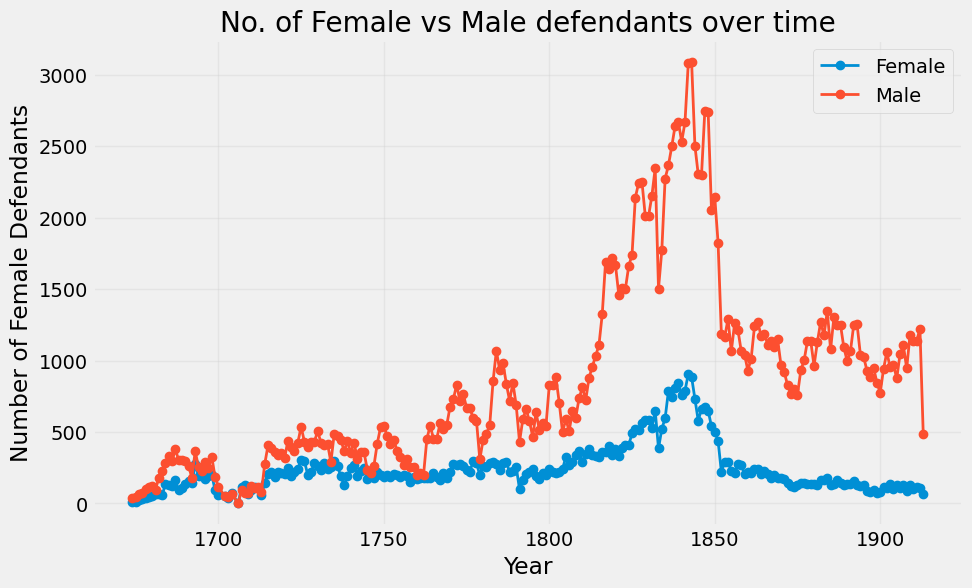

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(yearly['session_year'], yearly['is_female_defendant'], marker='o', linewidth=2, label = 'Female')
plt.plot(yearly['session_year'], yearly['is_male_defendant'], marker='o', linewidth=2, label='Male')
plt.xlabel('Year')
plt.ylabel('Number of Female Defendants')
plt.title('No. of Female vs Male defendants over time')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Exactly what we suspected! There is an increase in male and female committed crimes during this peak. that doesn't mean its not worth investigating... but a peak in crime between 1800 and 1850 may have less to do with gender than the first graph suggested. 
Lets have a closer look at this peaked time period...

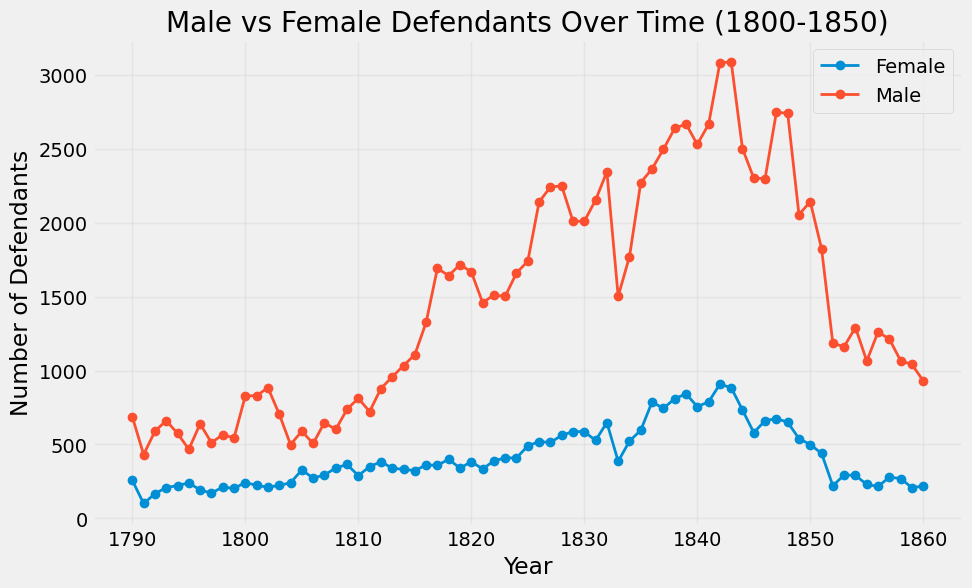

In [24]:
# Filter yearly data to 1800-1850
yearly_filtered = yearly[(yearly['session_year'] >= 1790) & (yearly['session_year'] <= 1860)]

plt.figure(figsize=(10, 6))
plt.plot(yearly_filtered['session_year'], yearly_filtered['is_female_defendant'], marker='o', linewidth=2, label='Female')
plt.plot(yearly_filtered['session_year'], yearly_filtered['is_male_defendant'], marker='o', linewidth=2, label='Male')
plt.xlabel('Year')
plt.ylabel('Number of Defendants')
plt.title('Male vs Female Defendants Over Time (1800-1850)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [25]:
# Calculating percentage
yearly['female_defendant_rate'] = (yearly['is_female_defendant'] / yearly['trial_id']) * 100
# If year 1679 had 100 trials and 20 were female → 20/100 * 100 = 20%

In [26]:
#  Get descriptive stats of those percentages across all years
yearly['female_defendant_rate'].describe()

count    238.000000
mean      25.917347
std       11.488302
min        0.000000
25%       17.598419
50%       24.440425
75%       34.046062
max       65.346535
Name: female_defendant_rate, dtype: float64

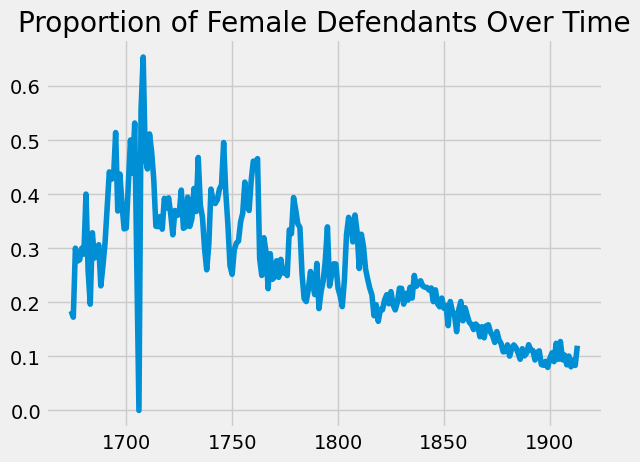

In [27]:
# Female defendants over time
yearly = df.groupby('session_year')['is_female_defendant'].agg(['sum', 'count'])
yearly['proportion'] = yearly['sum'] / yearly['count']
plt.plot(yearly.index, yearly['proportion'])
plt.title('Proportion of Female Defendants Over Time')
plt.show()

### Initial thoughts:

When we look at the *percentage* of defendants who were women, there's a weird spike in 1710. But when we look at the *actual number* of women being tried, the big spike happens between 1800-1850. These tell different stories.

The 1710 spike in percentage is probably just because fewer trials happened that year overall, so the women who *were* tried made up a bigger slice of a smaller pie. The 1800-1850 spike is different: it's a genuine increase in the number of women actually being prosecuted.

What's more interesting is what happens *after* 1710. The percentage of female defendants generally decreases over time, even as absolute numbers spike in 1800-1850. Essentially, this means that while more women were being tried in absolute terms during industrialisation, they still made up a smaller *proportion* of all defendants compared to the early 1700s.

This suggests two things: (1) the 1800-1850 period saw economic or social changes that pulled more women into the criminal justice system, but (2) men were being prosecuted in even greater numbers during this period. The industrial urban boom affected crime patterns for both genders, but perhaps differently.

# attempting niccolos suggestion

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Prepare data
df_model = df[['defendant_gender', 'offence_category', 'session_year', 'punishment']].copy()
df_model = df_model.dropna(subset=['punishment'])

# Encode variables
le_gender = LabelEncoder()
le_offence = LabelEncoder()
le_punishment = LabelEncoder()

df_model['gender'] = le_gender.fit_transform(df_model['defendant_gender'])
df_model['offence'] = le_offence.fit_transform(df_model['offence_category'])
df_model['punishment_code'] = le_punishment.fit_transform(df_model['punishment'])

# Split by time
train = df_model[df_model['session_year'] < 1903]
test = df_model[df_model['session_year'] >= 1903]

# Train and test
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(train[['gender', 'offence']], train['punishment_code'])

train_accuracy = clf.score(train[['gender', 'offence']], train['punishment_code'])
test_accuracy = clf.score(test[['gender', 'offence']], test['punishment_code'])

print("Training accuracy (pre-1903):", train_accuracy)
print("Test accuracy (1903-1913):", test_accuracy)

Training accuracy (pre-1903): 0.4756381900787728
Test accuracy (1903-1913): 0.7795626088639442


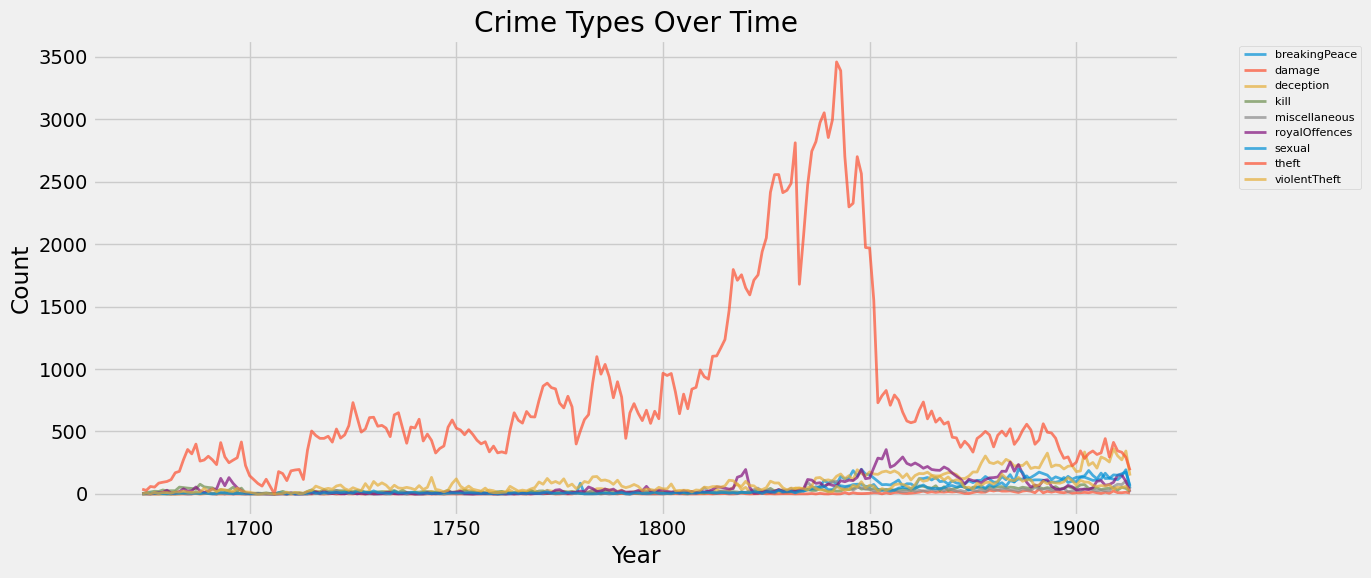

In [29]:
import matplotlib.pyplot as plt

# Group by year and offence category
crime_by_year = df.groupby(['session_year', 'offence_category']).size().unstack(fill_value=0)

# Plot
plt.figure(figsize=(14, 6))
for offence in crime_by_year.columns:
    plt.plot(crime_by_year.index, crime_by_year[offence], label=offence, linewidth=2, alpha=0.7)

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Crime Types Over Time')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
plt.tight_layout()
plt.show()

C:\Users\shayb\AppData\Local\Temp\ipykernel_24020\593977400.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


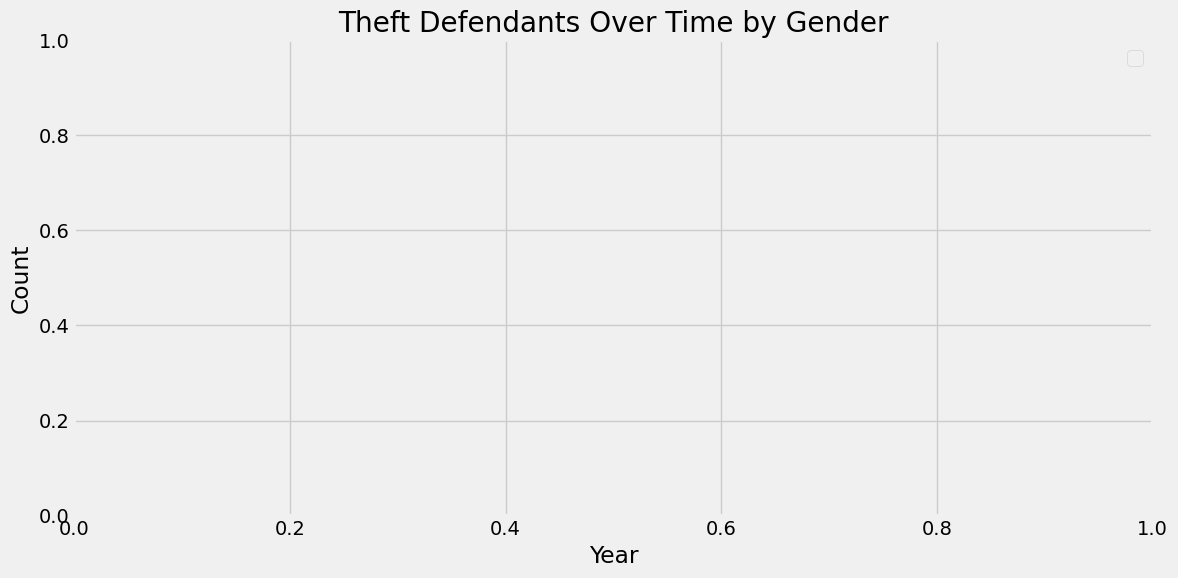

In [30]:
import matplotlib.pyplot as plt

# Filter for theft only
theft_data = df[df['offence_subcategory'] == 'theft']

# Group by year and gender
theft_by_year_gender = theft_data.groupby(['session_year', 'defendant_gender']).size().unstack(fill_value=0)

# Plot
plt.figure(figsize=(12, 6))
for gender in theft_by_year_gender.columns:
    plt.plot(theft_by_year_gender.index, theft_by_year_gender[gender], label=gender, linewidth=2)

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Theft Defendants Over Time by Gender')
plt.legend()
plt.tight_layout()
plt.show()

# Modelling
using visualisation tools to map our findings

# evaluating

What patterns can we see here?

# Visualising

Now we present our findings in Shiny!